Importo i dati da histdata.com

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

#import EURGBP june data
data = pd.read_csv('/home/edoardo/Desktop/python/eurgbp data.csv', sep=',', header=0, index_col=0, parse_dates=True)

print(data.head())

                       open    high     low   close
timestamp                                          
2023-01-01 00:00:00  0.8847  0.8847  0.8847  0.8847
2023-01-01 00:01:00  0.8847  0.8847  0.8847  0.8847
2023-01-01 00:02:00  0.8847  0.8847  0.8847  0.8847
2023-01-01 00:03:00  0.8847  0.8847  0.8847  0.8847
2023-01-01 00:04:00  0.8847  0.8847  0.8847  0.8847


In [ ]:
import mplfinance as mpf

# Assuming 'data' DataFrame is already prepared as per the previous code snippet
# and it's indexed by date with 'Open', 'High', 'Low', 'Close' columns.

# Plotting the candlestick chart
mpf.plot(data, type='candle', style='charles',
         title='EURGBP June Candlestick',
         ylabel='Price', figratio=(12,6))

Interactive plot and subsetting:

In [ ]:
#subset data from 2023 to 2024
data_subset = data['2024-05-01':'2024-07-02']
data_subset["close"].plot(title= 'EURGBP interactive plot', backend="plotly")


-------------------------------------------------------------------------------------------

# Qui raggruppo la deviazione standard per i ritorni di ogni singola ora

In [ ]:
data["Returns"] = data["close"].pct_change() * 100
new_df = data["Returns"].resample("h").std()
#drop nan values
new_df = new_df.dropna()

To achieve your goal, follow these steps in pseudocode:

1. Ensure you have the [`new_df`](command:_github.copilot.openSymbolFromReferences?%5B%7B%22%24mid%22%3A1%2C%22fsPath%22%3A%22%2Fhome%2Fedoardo%2FDesktop%2Fpython%2FEURGBP%20monthly%20plot.ipynb%22%2C%22path%22%3A%22%2Fhome%2Fedoardo%2FDesktop%2Fpython%2FEURGBP%20monthly%20plot.ipynb%22%2C%22scheme%22%3A%22vscode-notebook-cell%22%2C%22fragment%22%3A%22X16sZmlsZQ%3D%3D%22%7D%2C%7B%22line%22%3A1%2C%22character%22%3A0%7D%5D "/home/edoardo/Desktop/python/EURGBP monthly plot.ipynb") DataFrame, which contains the standard deviation of returns resampled hourly.
2. Group [`new_df`](command:_github.copilot.openSymbolFromReferences?%5B%7B%22%24mid%22%3A1%2C%22fsPath%22%3A%22%2Fhome%2Fedoardo%2FDesktop%2Fpython%2FEURGBP%20monthly%20plot.ipynb%22%2C%22path%22%3A%22%2Fhome%2Fedoardo%2FDesktop%2Fpython%2FEURGBP%20monthly%20plot.ipynb%22%2C%22scheme%22%3A%22vscode-notebook-cell%22%2C%22fragment%22%3A%22X16sZmlsZQ%3D%3D%22%7D%2C%7B%22line%22%3A1%2C%22character%22%3A0%7D%5D "/home/edoardo/Desktop/python/EURGBP monthly plot.ipynb") by the hour of the day. This requires extracting the hour from the index (assuming the index is a datetime object).
3. Calculate the mean for each group (each hour of the day).
4. Plot the resulting average standard deviations for each of the 24 hours.

Here's how you can implement it in Python:



In [ ]:
import matplotlib.pyplot as plt

# Assuming 'new_df' is your DataFrame with hourly standard deviations of returns

# Step 2: Group by hour of the day
hourly_avg_std = new_df.groupby(new_df.index.hour).mean()

# Step 3: Plotting
hourly_avg_std.plot(kind='bar', figsize=(10, 6))
plt.title('Average Hourly Standard Deviation of Returns from 1 january to 2 july')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Standard Deviation')
plt.show()

# Rifaccio la stessa cosa con i ritorni medi per vedere se ci sono dei bias nei ritorni:

In [3]:
data["returns"] = data["close"].pct_change()
new_df = data["returns"].resample("h").mean()
#drop nan values
new_df = new_df.dropna()

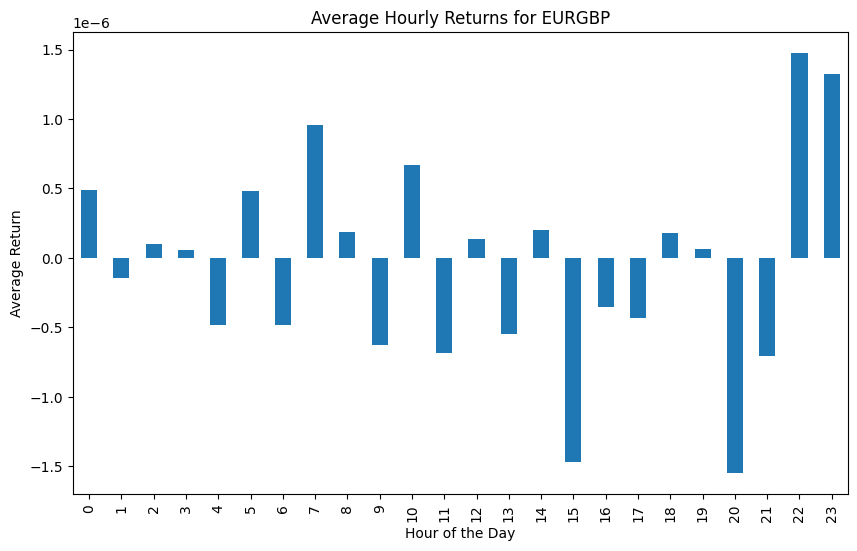

In [4]:
import matplotlib.pyplot as plt

# Assuming 'new_df' is your DataFrame with hourly standard deviations of returns

# Step 2: Group by hour of the day
hourly_avg_rtrn = new_df.groupby(new_df.index.hour).mean()

# Step 3: Plotting
hourly_avg_rtrn.plot(kind='bar', figsize=(10, 6))
plt.title('Average Hourly Returns for EURGBP')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Return')
plt.show()

/tmp/ipykernel_10676/3363768238.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strategy["returns_strategy"] = (1 + strategy["returns"]).cumprod() - 1


average return: 1.3990932533549723e-06


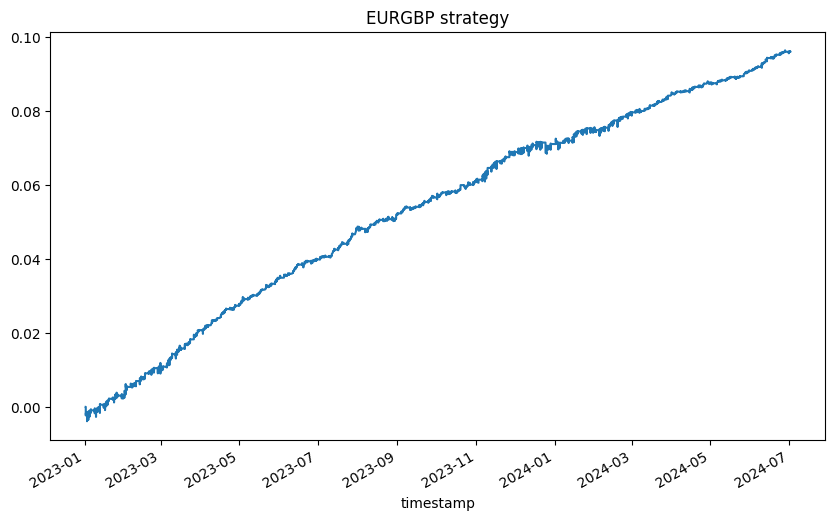

In [6]:
#WE TRY TO BUY ONLY AT 22:00
data["hour"] = data.index.hour
strategy = data[(data["hour"] == 22) | (data["hour"] == 23)]
strategy["returns_strategy"] = (1 + strategy["returns"]).cumprod() - 1

strategy["returns_strategy"].plot(title='EURGBP strategy', figsize=(10, 6))
print("average return:",strategy["returns"].mean())